In [41]:
import sympy as sy
import numpy as np
from math import sqrt, exp, log
from numpy import linalg as LA
import matplotlib.pyplot as plt

plt.rcParams['savefig.facecolor'] = 'white'  # jupyterでグラフ範囲以外の背景が透明になってる場合はやる．
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'
plt.rcParams["font.family"] = "Times New Roman"

plt.rcParams['font.size'] = 12  #フォントサイズ
plt.rcParams['lines.linewidth'] = 2  # 先の太さ
plt.rcParams['figure.subplot.bottom'] = 0.20
x = np.arange(-1, 1, 0.01)

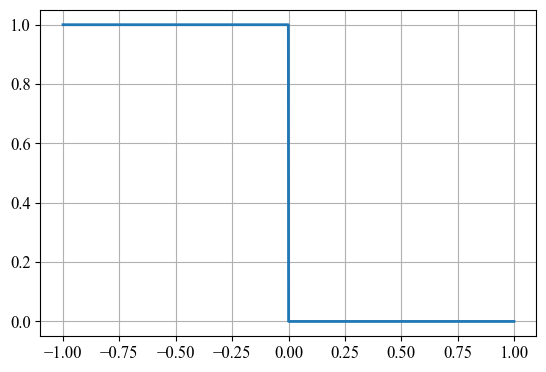

In [6]:
def sgn(x_dot):
    if x_dot < 0:
        return 1
    else:
        return 0
x = np.arange(-1, 1, 0.001)
y_sgn = [sgn(i) for i in x]
plt.plot(x, y_sgn)
plt.grid()


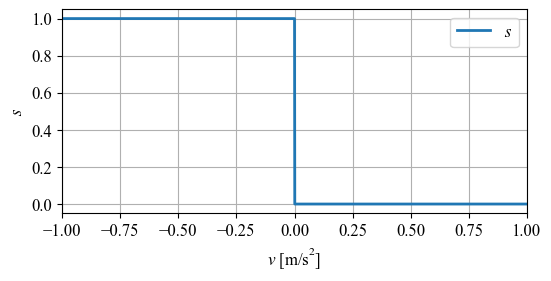

In [30]:
def sgn2(v):
    if abs(v) < 1e-5:
        return 1
    else:
        return 1/2*(1-v/abs(v))

y_sgn = [sgn2(i) for i in x]
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)
ax.plot(x, y_sgn, label=r"$s$")
ax.grid()
ax.set_xlim(-1, 1)
ax.set_xlabel(r"$\it{v}$ [$\rm{m/s^2}$]")
ax.set_ylabel(r"$\it{s}$")
ax.legend()
fig.savefig('syuron_3_fig/sgn.png')

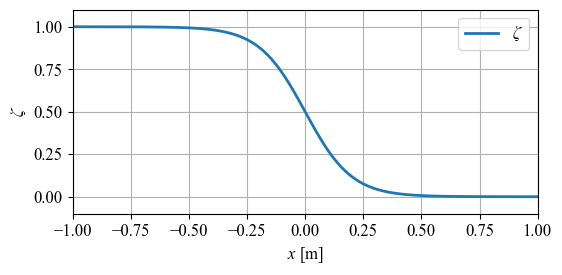

In [40]:
def sigmoid(x, alpha):
    return 1 / (1 + sy.exp(-alpha * x))

y_sig = [-sigmoid(i, 10)+1 for i in x]
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)
ax.plot(x, y_sig, label=r"$\it{\zeta}$")
ax.grid()
ax.set_xlim(-1, 1)
ax.set_ylim(-0.1, 1.1)
ax.set_xlabel(r"$\it{x}$ [$\rm{m}$]")
ax.set_ylabel(r"$\it{\zeta}$")
ax.legend()
fig.savefig('syuron_3_fig/sigmoid.png')

(-1.0995000000000001,
 1.089500000000002,
 -0.049950062344427254,
 1.0499500623444273)

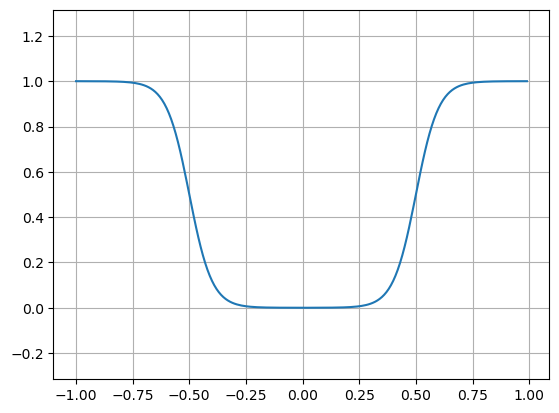

In [4]:
def s2(x, r, alpha,):
    return 1/2 * (np.tanh(-alpha*(abs(x)-r)) + 1)

y_s2 = [-s2(i, 0.5, 10)+1 for i in x]
plt.plot(x, y_s2)
plt.grid()
plt.axis('equal')

(-1.0995000000000001, 1.089500000000002, -0.04, 1.06)

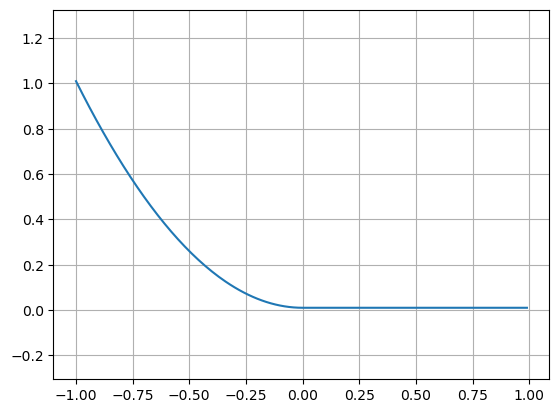

In [5]:
# ペアワイズ障害物会費

def u_pair_obs(x_dot, e):
    return e + min(0, x_dot)*x_dot
y = [u_pair_obs(xi, 1e-2) for xi in x]
plt.plot(x, y)
plt.grid()
plt.axis('equal')

---
重み関数

(-0.08900000000000001, 2.089, 0.24135681669928247, 4.9771689497716896)

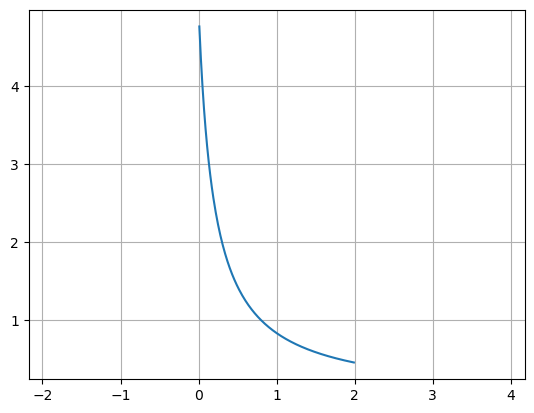

In [28]:
#重み関数
r = 0.2
x = np.arange(0.01, 2, 0.01)
y = [1 / (xi+r) for xi in x]
plt.plot(x, y)
plt.grid()
plt.axis('equal')

(-5.244499999999995,
 0.13449999999989057,
 -0.04366649128547549,
 1.0496945002340805)

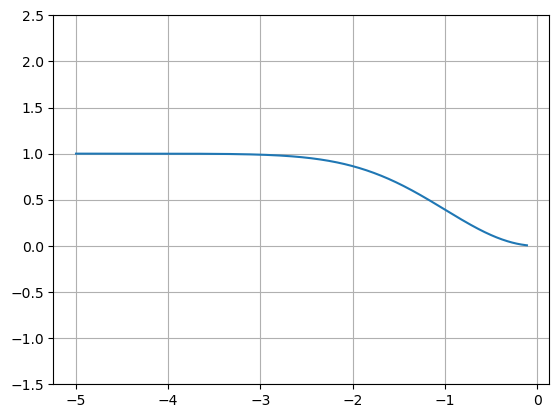

In [13]:
#R2の速度重み関数
def u(s_dot):
    if s_dot < 0:
        return 1 - np.exp(-s_dot**2/(2*1**2))
    else:
        return 0

x = np.arange(-5, -0.1, 0.01)
y = [u(xi) for xi in x]
plt.plot(x, y)
plt.grid()
plt.axis('equal')

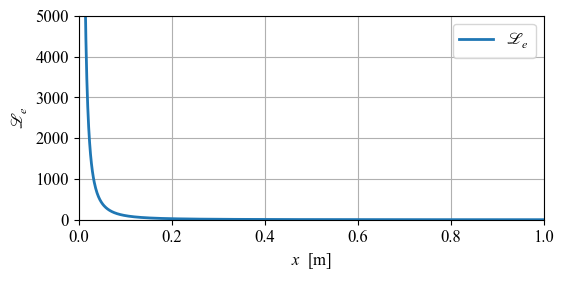

In [44]:
x = np.arange(0.01, 1, 0.001)
y = [1/xi**2 for xi in x]
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)
ax.plot(x, y, label=r"$\mathscr{L}_e$")
ax.set_xlim(0, 1)
ax.set_ylim(0, 5000)
ax.set_xlabel(r"$\it{x}$  [m]")
ax.set_ylabel(r"$\mathscr{L}_e$")
ax.grid()#; plt.axis('equal')#;
plt.legend()
fig.savefig('syuron_3_fig/obs_Le_con.png')

(-0.9890000000000001, 20.989, -4.985190302713111, 3.3752522652373287)

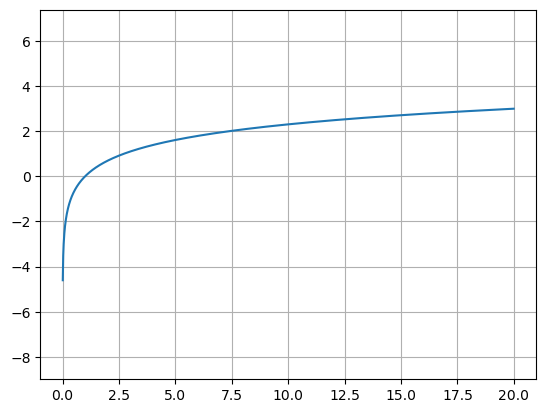

In [47]:
x = np.arange(0.01, 20, 0.01)
y = [np.log(xi) for xi in x]
plt.plot(x, y)
#plt.ylim(0, 10)
plt.grid(); plt.axis('equal')

(-0.08900000000000001, 2.089, -0.029980731770722063, 1.0489419448460502)

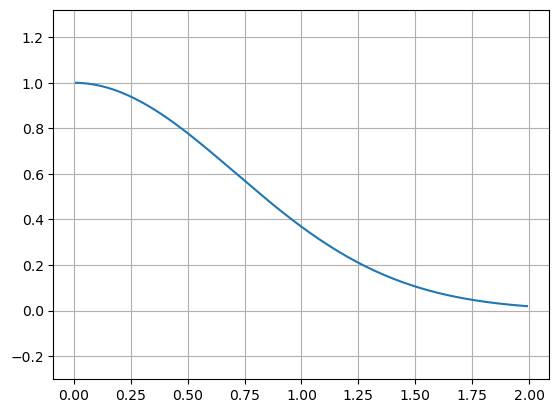

In [56]:
x = np.arange(0.01, 2, 0.01)
y = [np.exp(-xi**2) for xi in x]
plt.plot(x, y)
#plt.ylim(0, 10)
plt.grid(); plt.axis('equal')

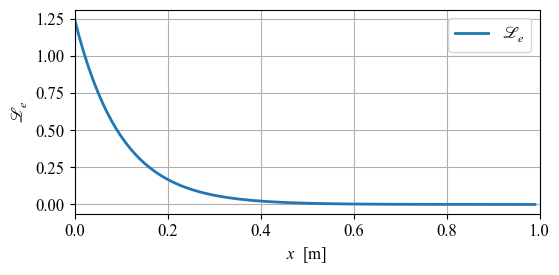

In [39]:
# 修論の障害物フィンスラー
a = 10
x_dot=-0.5
x = np.arange(0., 1, 0.01)
y = [1/2*x_dot**2*a*np.exp(-a*xi) for xi in x]
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)
ax.plot(x, y, label=r"$\mathscr{L}_e$")
ax.set_xlim(0, 1)
ax.set_xlabel(r"$\it{x}$  [m]")
ax.set_ylabel(r"$\mathscr{L}_e$")
ax.grid()#; plt.axis('equal')#;
plt.legend()
fig.savefig('syuron_3_fig/obs_Le.png')

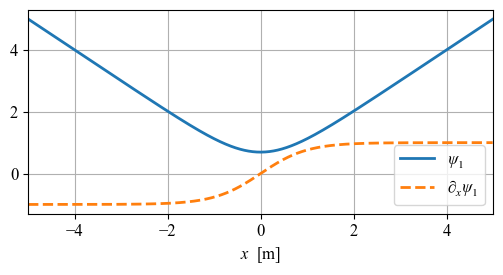

In [50]:
#R2のアトラクターのポテンシャル関数
eta = 1
xs = np.arange(-5, 5, 0.01)
ys = [abs(x) + 1/eta*np.log(1+np.exp(-2*eta*abs(x))) for x in xs]
ys2 = [(1-np.exp(-2*eta*abs(x)))/(1+np.exp(-2*eta*abs(x))) * x/abs(x) for x in xs]
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)
ax.plot(xs, ys, label=r"$\psi_1$")
ax.plot(xs, ys2, label=r"$\partial_x\psi_1$", linestyle="dashed")
ax.set_xlim(-5, 5)
ax.set_xlabel(r"$\it{x}$  [m]")
#ax.set_ylabel(r"$\mathscr{L}_e$")
ax.grid()#; plt.axis('equal')#;
plt.legend()
fig.savefig('syuron_3_fig/att_pot.png')

(-5.49949999999999, 5.489499999999777, -1.099900032983324, 1.0998981988727103)

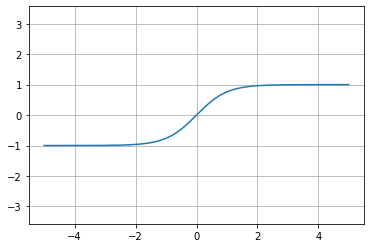

In [17]:
#R2のアトラクターのポテンシャル関数の勾配
eta = 1
xs = np.arange(-5, 5, 0.01)
ys = [(1-np.exp(-2*eta*abs(x)))/(1+np.exp(-2*eta*abs(x))) * x/abs(x) for x in xs]
plt.plot(xs, ys); plt.grid(); plt.axis('equal')

(-5.49949999999999, 5.489499999999777, -1.0999900022338935, 1.0999898002546042)

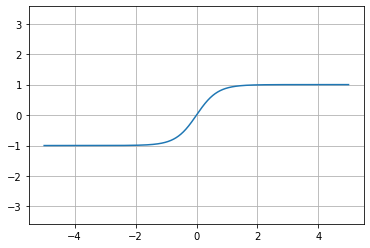

In [16]:
#R1のアトラクターのポテンシャル関数の勾配
eta = 1
xs = np.arange(-5, 5, 0.01)
ys = [x/(abs(x) + 1/eta*np.log(1+np.exp(-2*eta*abs(x)))) for x in xs]
plt.plot(xs, ys); plt.grid(); plt.axis('equal')

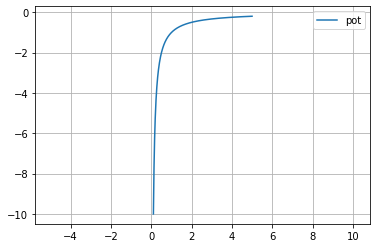

In [21]:
# 重力ポテンシャルとその勾配
xs = np.arange(0.1, 5, 0.01)
ys = [-1/x for x in xs]
plt.plot(xs, ys); plt.grid(); plt.axis('equal')

(0.2754999999999998, 5.214500000000004, -0.15783149465263197, 4.19799197593584)

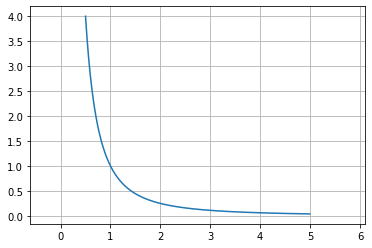

In [24]:
xs = np.arange(0.5, 5, 0.01)
ys = [1/x**2 for x in xs]
plt.plot(xs, ys); plt.grid(); plt.axis('equal')

(-5.49949999999999, 5.489499999999777, -0.625, 13.125)

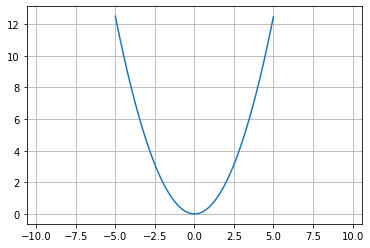

In [26]:
# バネポテンシャル
k=1
xs = np.arange(-5, 5, 0.01)
ys = [1/2*k*x**2 for x in xs]
plt.plot(xs, ys); plt.grid(); plt.axis('equal')

(-5.49949999999999, 5.489499999999777, -5.49949999999999, 5.489499999999777)

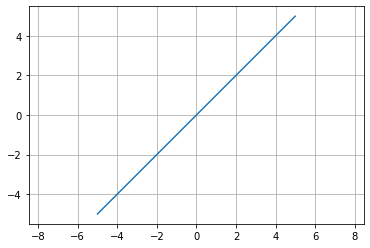

In [27]:
# バネポテンシャルの勾配
k=1
xs = np.arange(-5, 5, 0.01)
ys = [k*x for x in xs]
plt.plot(xs, ys); plt.grid(); plt.axis('equal')

(0.9504999999999999,
 2.0395000000000008,
 0.34015552557314765,
 1.0314211654488978)

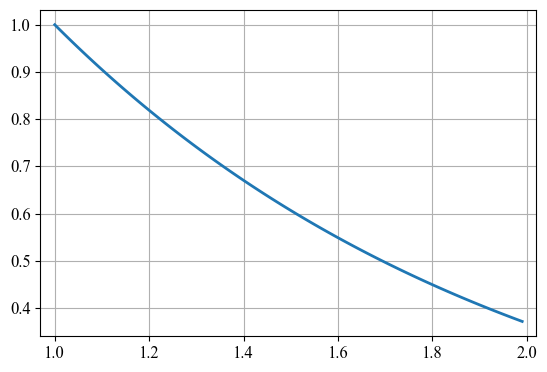

In [93]:
# タライ場関数
def v(x, r, d):
    return 1*np.exp(-(x-1))
xs = np.arange(1.,2, 0.01)
ys = [v(x, 1, 5) for x in xs]
plt.plot(xs, ys); plt.grid(); plt.axis('equal')

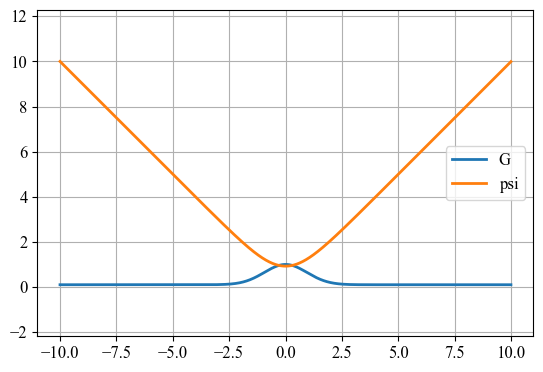

In [62]:
# 幾何学的ファブリックの目標アトラクタの計量とポテンシャル関数
# 1次元で図示
m_u = 1; m_l = 0.1; alpha_m = 0.75; k = 1; alpha_psi = alpha_m
def G(x):
    return (m_u - m_l) * np.exp(-(alpha_m * abs(x))**2) * 1 + m_l * 1
def psi(x):
    return k * (abs(x) + 1/alpha_psi * np.log(1 + np.exp(-2 * alpha_psi * abs(x))))

xs = np.arange(-10,10, 0.01)
ys = [G(x) for x in xs]
ys2 = [psi(x) for x in xs]
plt.plot(xs, ys, label="G")
plt.plot(xs, ys2, label="psi")
plt.grid(); plt.axis('equal'); plt.legend()

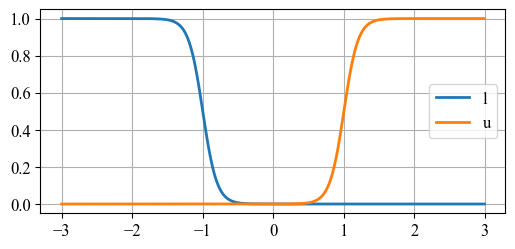

In [107]:
def sigmoid_l(x, xl, alpha):
    return -1 / (1 + exp(-alpha * (x-xl))) + 1

def sigmoid_u(x, xu, alpha):
    return 1 / (1 + exp(-alpha * (x-xu)))

x = np.arange(-3, 3, 0.01)
yl = [sigmoid_l(i, -1, 10) for i in x]
yu = [sigmoid_u(i, 1, 10) for i in x]
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)
ax.plot(x, yl, label="l")
ax.plot(x, yu, label="u")
ax.grid()
# ax.set_xlim(-1, 1)
# ax.set_ylim(-0.1, 1.1)
ax.legend()

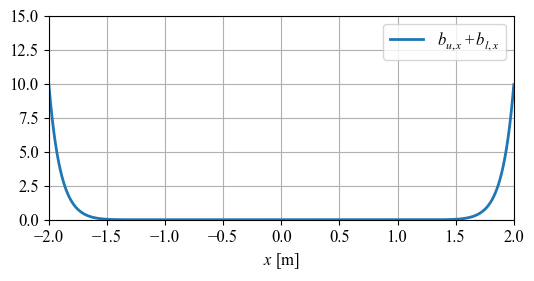

In [130]:
# 移動空間制約

a = 10
xl = -2
xu = 2
r = 0.5
alpha = 10
def g(x):
    bl = a * exp(-a*(x-xl)) * sigmoid_l(x, xl+r, 10)
    bu = a * exp(a*(x-xu)) * sigmoid_u(x, xu-r, 10) 
    return bu + bl
xs = np.linspace(-2, 2, 10000)
ys = [g(i) for i in xs]
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)
ax.plot(xs, ys, label=r"$\it{b_{u, x} + b_{l, x}}$")
ax.grid()
ax.set_xlim(-2, 2)
ax.set_ylim(0, 15)
ax.set_xlabel(r"$\it{x}$ [$\rm{m}$]")
#ax.set_ylabel(r"$\it{b_{u, x} + b_{l, x}}$")
ax.legend()
fig.savefig('syuron_3_fig/metric_space_limit.png')

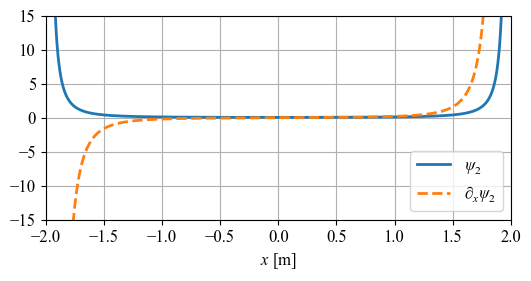

In [159]:
# 移動空間制約のポテンシャル勾配

a = 10
xl = -2
xu = 2
k = 0.1
def g(x):
    bu = (x - xu)**(-2)
    bl = (x - xl)**(-2)
    return k * (bu + bl)
def grad(x):
    bu = -2*(x - xu)**(-3)
    bl = -2*(x - xl)**(-3)
    return k * (bu + bl)
xs = np.linspace(-1.95, 1.95, 1000)
ys = [g(i) for i in xs]
ys_2 = [grad(i) for i in xs]
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)
ax.plot(xs, ys, label=r"$\it{\psi_2}$")
ax.plot(xs, ys_2, label=r"$\it{\partial_x\psi_2}$", linestyle="dashed")
ax.grid()
ax.set_xlim(-2., 2.)
ax.set_ylim(-15, 15)
ax.set_xlabel(r"$\it{x}$ [$\rm{m}$]")
#ax.set_ylabel(r"$\it{b_{u, x} + b_{l, x}}$")
ax.legend()
fig.savefig('syuron_3_fig/grad_space_limit.png')